In [1]:
import requests 
from bs4 import BeautifulSoup 
from tabulate import tabulate 
import os 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
URL = 'https://www.mohfw.gov.in/'
SHORT_HEADERS = ['SNo', 'State', 'Indian-Confirmed','Foreign-Confirmed','Cured','Death']

response = requests.get(URL).content
soup = BeautifulSoup(response , 'html.parser')
header = extract_contents(soup.tr.find_all('th'))

stats = []
all_rows = soup.find_all('tr')

for row in all_rows:
    stat = extract_contents(row.find_all('td'))
    if stat:
        if len(stat) == 5:
            stat = ['', *stat]
            stats.append(stat)
            
        elif len(stat) == 6:
            stats.append(stat)
            
stats[-1][1] = "Total Cases"

stats.remove(stats[-1])

In [6]:
objects = []
for row in stats:
    objects.append(row[1])
y_pos = np.arange(len(objects))

performance = []
for row in stats:
    performance.append(int(row[2])+ int(row[3]))
    
table = tabulate(stats, headers = SHORT_HEADERS)
print(table)

  SNo  State                Indian-Confirmed    Foreign-Confirmed    Cured    Death
-----  -----------------  ------------------  -------------------  -------  -------
    1  Andhra Pradesh                     11                    0        1        0
    2  Bihar                               3                    0        0        1
    3  Chhattisgarh                        3                    0        0        0
    4  Delhi                              34                    1        6        1
    5  Goa                                 3                    0        0        0
    6  Gujarat                            37                    1        0        2
    7  Haryana                            16                   14       11        0
    8  Himachal Pradesh                    3                    0        0        1
    9  Karnataka                          41                    0        3        1
   10  Kerala                            110                    8        4  

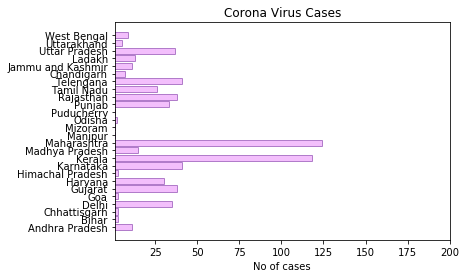

In [9]:
plt.barh(y_pos, performance, align = 'center' , alpha = 0.5,
        color=(234/256.0, 128/256.0, 252/256.0), edgecolor = (106/256,27/256,154/256))
plt.yticks(y_pos,objects)
plt.xlim(1,200)
plt.xlabel('No of cases')
plt.title('Corona Virus Cases')
plt.show()